<h1><center>D207: EDA Performance Assessment</center></h1>
<br>
<br>
<center>Department of Information Technology, Western Governor's University</center>
<br>
<center>Dr. David Gagner</center>
<br>
<center>November 28, 2023</center>
<br>
<br>
<br>
<br>

## A1. Research Question
For this project, I will be using the medical dataset, just as I did for D206. In D206, I asked a broad question: What variables could be related to readmission? For this assessment, I will focus on one variable in particular and ask the more specific question "Is there a relationship between anxiety and readmission?" To answer this question, I will be running a chi-square test for independence with α = 0.05.

A chi-square test for independence has the following hypotheses:

H₀ = Anxiety and readmission are independent

H₁ = Anxiety and readmission are dependent

## A2. Question Benefits
A hospital or hospital group might benefit from knowing whether or not a relationship exists between anxiety and readmission so that proactive actions can be taken to prevent readmission if such a relationship exists. A high readmission rate is unfavorable for both the patient and the hospital. Lower readmission rates improve patient outcomes and satisfaction and high readmission rates strain physicians and waste time and resources (Regis College, 2022). Thus, preventing readmissions is highly advisable. While anxiety is not a factor that can necessarily be controlled by the hospital, understanding that a relationship exists (if it exists) can enable physicians to find ways to mitigate the risk of readmission in patients that have anxiety by manipulating factors hospitals can control, such as spending more time educating the patient.

## A3. Relevant Data
In order to answer this question, I will use two variables:

1. ReAdmis, qualitative, example (row 1): No. This variable is binary and stores "yes" for patients who were readmitted within 1 month and "no" for patients who were not.

2. Anxiety, qualitative, example (row 1): Yes. This variable is binary and stores "yes" for patients with anxiety and "no" for those who do not have anxiety.

## Note: Necessary Cleaning
While this data is purported to be "clean," it is not clean enough for my preference. Storage as a CSV has recreated some of the same issues I cleaned in D206. Namely, these issues are columns stored as the wrong datatypes. This is particularly problematic for zip codes which are being stored as integers even though they are not quantitative in nature. Below, I have re-used some of my code from D206 to amend the datatypes of many columns in this dataset.

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotnine as p9

df = pd.read_csv('C:/Users/essay/Documents/D207 PA Dataset/medical_clean.csv', index_col = 0)

#Check datatypes and size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [2]:
# Visually inspect dataframe to ensure data loaded as expected and do initial visual exploration
pd.set_option("display.max_columns", None)
df

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",2,25,45967.61,Widowed,Male,No,16.980860,4,2,1,No,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4,87,14983.02,Widowed,Male,Yes,18.177020,5,0,0,No,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3,45,65917.81,Separated,Female,Yes,17.129070,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2


In [3]:
#Clean datatypes up using code from D206 PA. 
#[In-Text Citation: (Nelson, 2023).]

# Convert Zip to string from integer.
df['Zip'] = df['Zip'].astype('str')
# Add leading zeros using zfill()
df['Zip'] = df['Zip'].str.zfill(5)
# Identify columns that can be converted all at once to category datatype using for loop.
category_cols = df[['Area', 'Marital', 'Initial_admin', 'Complication_risk', 'Services', 'ReAdmis',
                         'Soft_drink', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
                         'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']]
# Will do Item# columns later since they require an order. Timezone and Gender need a dict written, will do that later too.
# Anxiety and Overweight need re-encoding, will do those separately as well.
for col in category_cols:
    df[col] = df[col].astype('category')
# Write dictionary for option reduction for Timezone column
mapping_timezone = {'America/Puerto_Rico' : 'Atlantic',
          'America/New_York' : 'Eastern',
          'America/Detroit' : 'Eastern',
          'America/Indiana/Indianapolis' : 'Eastern',
          'America/Indiana/Vevay' : 'Eastern',
          'America/Indiana/Vincennes' : 'Eastern',
          'America/Kentucky/Louisville' : 'Eastern',
          'America/Toronto' : 'Eastern',
          'America/Indiana/Marengo' : 'Eastern',
          'America/Indiana/Winamac' : 'Eastern',
          'America/Chicago' : 'Central',
          'America/Menominee' : 'Central',
          'America/Indiana/Knox' : 'Central',
          'America/Indiana/Tell_City' : 'Central',
          'America/North_Dakota/Beulah' : 'Central',
          'America/North_Dakota/New_Salem' : 'Central',
          'America/Denver' : 'Mountain',
          'America/Boise' : 'Mountain',
          'America/Phoenix' : 'Mountain',
          'America/Los_Angeles' : 'Pacific',
          'America/Nome' : 'Alaskan',
          'America/Anchorage' : 'Alaskan',
          'America/Sitka' : 'Alaskan',
          'America/Yakutat' : 'Alaskan',
          'America/Adak' : 'Hawaiian',
          'Pacific/Honolulu' : 'Hawaiian'
          }
# Use dictionary to convert timezone options.
df.TimeZone.replace(mapping_timezone, inplace=True)
# Convert timezone to category datatype.
df['TimeZone'] = df['TimeZone'].astype('category')
# Convert gender to category datatype.
df['Gender'] = df['Gender'].astype('category')
# Convert Overweight to category datatype.
df['Overweight'] = df['Overweight'].astype('category')
# Convert Anxiety to category datatype.
df['Anxiety'] = df['Anxiety'].astype('category')

# Create ordered categories for Item# variables. 8 is "least important" and 1 is "most important"
survey_scores = CategoricalDtype(categories=['8', '7', '6', '5', '4', '3', '2', '1'], ordered=True)
# Identify columns that need to become ordered categorical
ord_cat_cols = df[['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']]
# Create for loop to convert columns above to string (issues if not string first,) then ordered categorical datatype.
for col in ord_cat_cols:
    df[col] = df[col].astype('str')
    df[col] = df[col].astype(survey_scores)

In [4]:
# Re-inspect DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer_id         10000 non-null  object  
 1   Interaction         10000 non-null  object  
 2   UID                 10000 non-null  object  
 3   City                10000 non-null  object  
 4   State               10000 non-null  object  
 5   County              10000 non-null  object  
 6   Zip                 10000 non-null  object  
 7   Lat                 10000 non-null  float64 
 8   Lng                 10000 non-null  float64 
 9   Population          10000 non-null  int64   
 10  Area                10000 non-null  category
 11  TimeZone            10000 non-null  category
 12  Job                 10000 non-null  object  
 13  Children            10000 non-null  int64   
 14  Age                 10000 non-null  int64   
 15  Income              10000 non-null  

## B1. Data Analysis Using Chi-Square
In order to answer this question, I will be using a chi-square test, specifically a chi-square test for independence. Below is the code necessary to create a contingency table and perform such a test. Please note that the code used to print out the p-value and other outputs is shown in section B2.

In [5]:
contingency = pd.crosstab(df.ReAdmis, df.Anxiety)
print(contingency)

Anxiety    No   Yes
ReAdmis            
No       4301  2030
Yes      2484  1185


In [6]:
c, p, dof, expected = stats.chi2_contingency(contingency)

## B2. Analysis Outputs
The chi-square test for independence returned a p-value of 0.827 as shown in the below output. This p-value is very high, much higher than the alpha level set for this hypothesis test. In order to be statistically significant, the p-value should be lower than the chosen alpha level of 0.05. Since the p-value is far higher than the alpha, I will accept the null hypothesis. Thus, I can come to the conclusion that having anxiety and getting readmitted are independent of each other, with no statistically significant relationship.

In [7]:
print("The test statistic is " + str(c))
print("The p-value is " + str(p))
print("The degrees of freedom value is " + str(dof))
print("The expected table is " + str(expected))

The test statistic is 0.047704706965444724
The p-value is 0.8271065021209385
The degrees of freedom value is 1
The expected table is [[4295.5835 2035.4165]
 [2489.4165 1179.5835]]


## B3. Technique Justification
The nature of the presented research question involved two categorical variables, both nominal. When choosing a hypothesis test, the type of data dealt with is an important factor in the decision. Since I had two categorical variables, I was all but limited to using a chi-square test for independence. If the question had involved a quantitative variable, then I might've chosen a t-test or ANOVA, depending on how many groups I needed to test (Bevans, 2023). Because I had two categorical variables and not just one that I could compare to some expected value table, this meant I had to use a chi-square test for independence and not a chi-square goodness-of-fit test (Turney, 2023). 

I will go a bit more in depth as to why a t-test, ANOVA, or other parametric test was not a correct choice for this particular research question. Besides the issue with the two variables' datatypes, parametric tests operate on a few assumptions, one of which is that the data follows a normal distribution. Normality of data applies to quantitative data, not qualitative data like the nominal variables used to answer this question(Bevans, 2023). Thus, this assumption is violated and parametric tests cannot be used. Instead, I had to use a non-parametric test that makes fewer assumptions. Based on the datatypes of the variables in question as discussed above, a chi-square test for independence fit the best.

## C1. Selection and Representation of Variables Using Univariate Statistics
Below are vizualizations showing the distribution of the following variables:

1. Income. This is a continuous variable visualized with a histogram.
2. Total Charge. This is a continuous variable visualized with a histogram.
3. Services. This is a categorical variable visualized with a histogram/bar chart.
4. Initial Admin. This is a categorical variable visualized with a histogram/bar chart.

Below these graphs, I have included .describe() for the continuous variables and .value_counts() for the categorical variables as a way to get a "sanity check" on whether or not the histograms appear to be drawn correctly and to provide more insight.

The **distribution** of income appears to be **right skewed.** The distribution for Total Charge is far more interesting-- it is **bimodal,** with two peaks.

Below these graphs, I have included .describe() for the continuous variables as a way to get a "sanity check" on whether or not the histograms appear to be drawn correctly and to provide more insight into the values plotted. For income, the mean reported by .describe() is roughly 40,490. This is shifted right from the peak of the distribution, drawn to the right by the tail. The 50th percentile, given in the .describe() for income as roughly 33,768, is lower than the mean. This indicates that the graph is indeed right skew.

For total charge, the mean is roughly 5,312 and the median is roughly 5,213. Bimodal distributions, when symmetrical, often times have similar values for the mean and the median. However, since the median and the mean vary from each other by about 100 dollars, this indicates the distribution is not perfectly symmetrical.

Please see commentary on the univariate categorical variables above the graphs of those variables below.

([<matplotlib.axis.YTick at 0x27bedbb16c0>,
 [Text(0, 0, '0'),
  Text(0, 250, '250'),
  Text(0, 500, '500'),
  Text(0, 750, '750'),
  Text(0, 1000, '1000'),
  Text(0, 1250, '1250')])

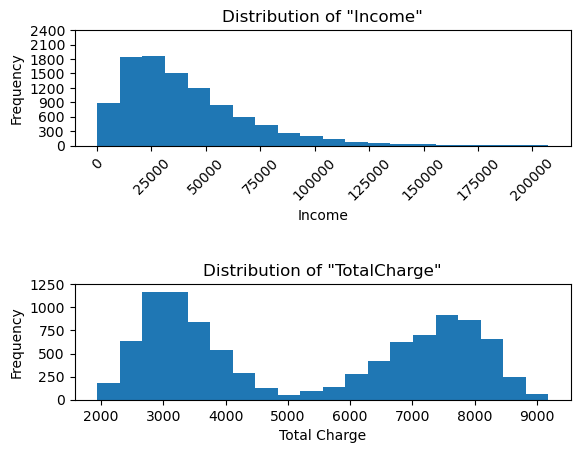

In [8]:
#Use subplots to display side by side 
#[In-Text Citation: (Matplotlib Subplot, n.d.).]
#Two continuous variables and space the subplots 
#[In-Text Citation: (GeeksforGeeks, 2022).]

plt.subplots_adjust(hspace = 1.2)

#Income
plt.subplot(2,1,1)
plt.hist(data=df, x = "Income", bins = 20)
plt.title('Distribution of "Income"')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.yticks(np.arange(0, 2500, 300))
plt.xticks(np.arange(0, 210000, 25000), rotation=45)

#Total Charge
plt.subplot(2,1,2)
plt.hist(data=df, x = "TotalCharge", bins = 20)
plt.title('Distribution of "TotalCharge"')
plt.xlabel('Total Charge')
plt.ylabel('Frequency')
plt.yticks(np.arange(0, 1500, 250))

The two graphs of categorical variables show visually the number of hospital stays in one category versus another. The **distribution** of services appears to be **right skewed,** with the mode or most frequent value being "blood work" on the left side of the graph. The other categories, intravenous, CT scan, and MRI have smaller and smaller frequencies as you look at the graph from left to right, as verified by the .value_counts() generated below.

The **distribution** of initial admin also appears to be **right skewed,** since the value with the highest frequency, emergency admission, appears on the right and the other two values, elective admission and observation admission, trail off to the left, though with similar frequencies of occurence, which is indicated both by the graph and the .value_counts() generated below.

([<matplotlib.axis.YTick at 0x27bedd37b50>,
 [Text(0, 0, '0'),
  Text(0, 1000, '1000'),
  Text(0, 2000, '2000'),
  Text(0, 3000, '3000'),
  Text(0, 4000, '4000'),
  Text(0, 5000, '5000')])

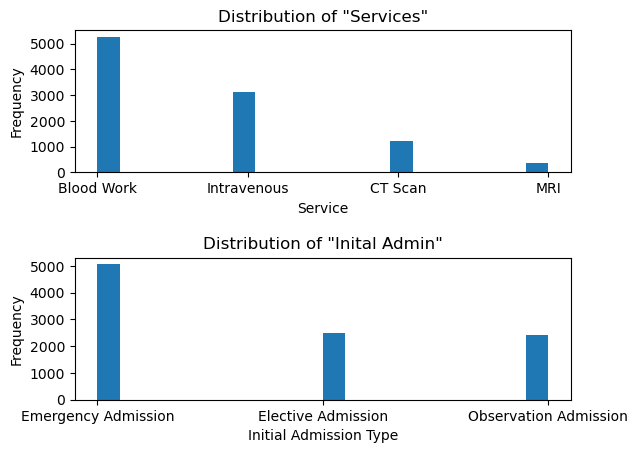

In [9]:
#Two categorical variables

plt.subplots_adjust(hspace = 0.6)

#Services
plt.subplot(2,1,1)
plt.hist(data=df, x = "Services", bins = 20)
plt.title('Distribution of "Services"')
plt.xlabel('Service')
plt.ylabel('Frequency')
plt.yticks(np.arange(0, 6000, 1000))

#Initial Admin
plt.subplot(2,1,2)
plt.hist(data=df, x = "Initial_admin", bins = 20)
plt.title('Distribution of "Inital Admin"')
plt.xlabel('Initial Admission Type')
plt.ylabel('Frequency')
plt.yticks(np.arange(0, 6000, 1000))


In [10]:
df.Income.describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

In [11]:
df.TotalCharge.describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [12]:
df.Services.value_counts()

Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: Services, dtype: int64

In [13]:
df.Initial_admin.value_counts()

Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64

## D1. Selection and Representation of Variables Using Bivariate Statistics
Below are vizualizations showing the relationship of the following variable pairs:

1. Total Charge and Initial Days. Both of these variables are continuous and visualized using a scatterplot.
2. Initial Admin and Services. Both of these variables are categorical and are visualized using a stacked bar chart.

Without an r-value to give a precise relationship strength of the scatterplot below, I would assume the variables total charge and initial days have a strong, positive relationship. That is, as the number of initial days increases, so too does total charge in dollars in a manner that is roughly constant. The graph presents a positive, **linear distribution** of datapoints, meaning the datapoints begin in the bottom left corner and are spread diagonally up to the top right corner. There is some variability in the total charge for any given number of initial days. For example, those staying 10 days could have a total charge of anywhere from 2500 to 4000 dollars. Without domain knowledge, I can only guess why there is a lack of data points around 35 days and five to six thousand dollars in total charge, but it appears to split the distribution into two groups. The group I will call Group A is distributed from roughly 1000 to 5800 dollars in total charge and 0 to 35 days in initial days. The second group, which I will call Group B is distributed from roughly 5000 to 9200 dollars in total charge and 36 to 72 initial days.

Below the graphs, I have provided .describe() for initial days. The .describe() output for total charge can be viewed above, in section C1, since it was already generated for that question.

Please view my commentary on the stacked bar chart directly above the graph.

<AxesSubplot: xlabel='TotalCharge', ylabel='Initial_days'>

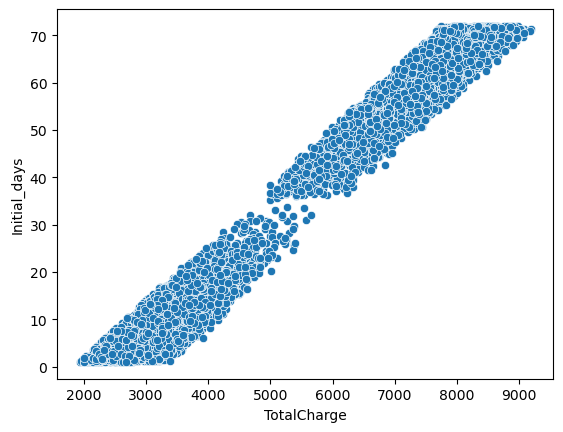

In [14]:
#Bivariate Total Charge (continuous) Initial_days (continuous)
sns.scatterplot(x="TotalCharge", y="Initial_days", data=df)

The stacked bar chart used for the categorical variables can be used to illustrate the number of each type of service required by each type of hospital admission. Between elective admission and observation admission, there is not much difference in the proportions of services required. And while the volume of emergency admissions is higher, proportionally speaking there is not much difference between its required services the proportions of services required by the other two categories of admission. If one wanted to more precise in comparing proportions, a 100% stacked bar chart could be created to do so. The **distribution** of this graph appears to be **normal,** since the most frequent bar, emergency admission, is in the middle. The two bars to the left and right of this central bar are roughly equal in height, meaning the graph is symmetrical, which is a property of the normal distribution.

For the categorical graph, I have provided the contingency table the graph illustrates. This was generated both as a "sanity check" to ensure the graph generated as expected and also to provide more insight into the graph itself. This contingency table verifies that the majority of each service provided is shown within the emergency admission bar. Smaller, roughly equal frequencies of each service make up the sections of the two bars to the left and right of the central, emergency admission bar. For example, elective admissions that required blood work occurred 1316 times, and observation admissions that required blood work occurred 1297 times, which are roughly equal. The same findings of rough equality apply to elective admissions that required CT scans and observation admissions that required CT scans, elective admissions that required intravenous and observation admissions that required intravenous, and elective admissions that required MRIs and observation admissions that required MRIs. Thus, the total number of services in the elective admission bar is roughly the same as the total number of services provided in the observation admission bar. This further verifies the roughly normal, symmetrical nature of the distribution of this data.

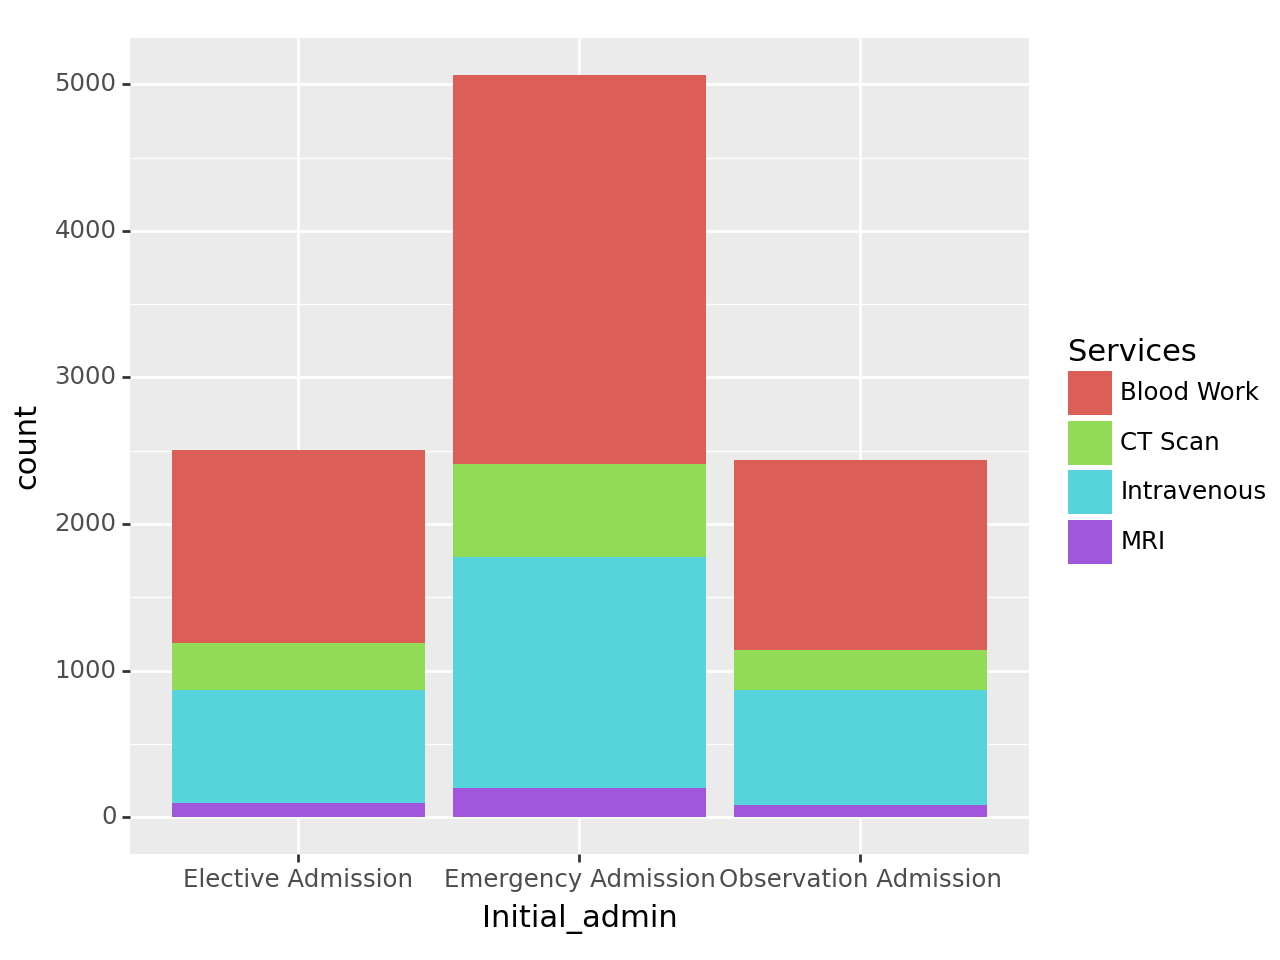

<Figure Size: (640 x 480)>

In [15]:
#Bivariate Initial_admin (categorical) and Services (categorical)
(p9.ggplot(df)+p9.aes('Initial_admin', fill ='Services') + p9.geom_bar())

In [16]:
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [17]:
bivartable = pd.crosstab(df.Initial_admin, df.Services)
print(bivartable)

Services               Blood Work  CT Scan  Intravenous  MRI
Initial_admin                                               
Elective Admission           1316      322          771   95
Emergency Admission          2652      632         1575  201
Observation Admission        1297      271          784   84


## E1. Hypothesis Test Results
As aforementioned, the alpha level I set for this chi-square test for independence was 0.05, the default for such a test. This is the level the p-value must be lower than to show a statistically significant difference indicating that anxiety has a relationship with readmission. A p-value below 0.05 would indicate this with 95% certainty. The p-value returned by the chi-square test was 0.827, which is much higher than the alpha level. Thus, the null hypothesis must be accepted-- these two variables are independent, with no relationship. In other words, the proportion of people readmitted is the same for those with anxiety and those without. With a p-value so remarkably high, this is something that can be said with some confidence. A p-value of 0.827 implies that if the null hypothesis is true, there is a 82.7% chance of observing the difference the test statistic describes (Bevans, 2023).

## E2. Analysis Limitations
Since non-parametric tests such as the chi-square test make fewer assumptions than parametric tests, inferences made with these tests aren't as strong as those made by parametric tests (Bevans, 2023).

In addition to its limitations as a non-parametric test in general, there are also some limitations of the chi-square test itself. The chi-square test's sensitivity to sample size can be problematic. In fact, if a sample size is large enough, a chi-square test can return outputs that indicate a statistically significant relationship where there is none (Chi-Square - Sociology 3112 - Department of Sociology - the University of Utah, n.d.). The sample size must also not be too small, as any given cell in the contingency table cannot be under 5. In my analysis, the sample size was not too small, but I do have concerns that it may have been too large (this dataset has 10,000 observations,) which lessens my confidence in the result despite the test showing no statistically significant relationship. However, I would be more concerned if it did show a statistically significant relationship as this limitation of the chi-square test would create false positives, also known as type I errors, rather than false negatives.

Given the right question, a chi-square test is a great choice, but one must have a question that contains only categorical variables of interest, otherwise it is useless. Thus, I had to tailor the question I wanted to ask to this particular test.

## E3. Recommendations
Since I accepted the null hypothesis, I would recommend making no changes to how people who suffer with anxiety are treated or given service versus the general population. However, given the large sample size I might recommend running the chi-square test again on a smaller sample (or perhaps running a test more suited to large sample sizes.) The sample should be just large enough to satisfy the conditions required by a chi-square, so as to avoid the oversensitivity issue and obtain a result I can be more confident in.

Besides re-running the chi-square on a smaller sample size, I would also recommend running more analysis on other variables (including more chi-square tests on the several other categorical variables in this dataset) to attempt to uncover a relationship between one of those variables and readmission.

## F. Panopto
A link to the Panopto recording is provided here: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=84b72838-c739-4ebf-a6b2-b0ca018003b0#

## G. Code Sources
GeeksforGeeks. (2022, September 15). *How to set the spacing between subplots in Matplotlib in Python.*<br>
&emsp;&emsp;https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/

*Matplotlib subplot.* (n.d.). http://www.w3schools.com/python/matplotlib_subplot.asp

Nelson, M. (2023, August 8). *D206: Data Cleaning Performance Assessment.* Unpublished manuscript, Western Governors University.

## H. Content Sources
Bevans, R. (2023, June 22). *Choosing the right statistical test | Types & examples.* Scribbr. https://www.scribbr.com/statistics/statistical-tests/

*Chi-Square - Sociology 3112 - Department of Sociology - The University of Utah.* (n.d.). https://soc.utah.edu/sociology3112/chi-square.php


Regis College. (2022, August 10). *How Reducing Hospital Readmissions Benefits Patients and Hospitals.*<br>
&emsp;&emsp;https://online.regiscollege.edu/blog/reducing-hospital-readmissions/

Turney, S. (2023, June 22). *Chi-Square (Χ2) Tests | Types, Formula & Examples.* Scribbr. https://scribbr.com/statistics/chi-square-tests/